# Датасеты

- Keras/Tensorflow
    - https://www.tensorflow.org/api_docs/python/tf/keras/datasets
    - https://keras.io/api/datasets/
- PyTorch
    - https://pytorch.org/vision/main/datasets.html

- ImageNet
    - https://www.image-net.org/download.php
    - The most highly-used subset of ImageNet is the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012-2017 image classification and localization dataset. This dataset spans 1000 object classes and contains 1,281,167 training images, 50,000 validation images and 100,000 test images. This subset is available on Kaggle.
- Hugging Face
    - https://huggingface.co/datasets

## Домашнее задание.
Протестировать различные архитектуры CNN на датасете CIFAR100 с использованием transfer learning (tf.keras.datasets.cifar100.load_data())
- Описание классов https://www.cs.toronto.edu/~kriz/cifar.html
- Предобученные модели
    - Keras https://keras.io/api/applications/
    - PyTorch https://pytorch.org/vision/stable/models.html
    - Huggning Face https://huggingface.co/models

# Coco dataset

- https://cocodataset.org/#home
- https://arxiv.org/abs/1405.0312
- https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

Features:
*   Object segmentation
*   Recognition in context
*   Superpixel stuff segmentation
*   330K images (>200K labeled)
*   1.5 million object instances
*   80 object categories
*   91 stuff categories
*   5 captions per image
*   250,000 people with keypoints

# YOLO model

## For images

In [2]:
# !pip install ultralytics
# !pip install opencv-python

In [3]:
# https://pytorch.org/hub/ultralytics_yolov5/
# https://pytorch.org/hub/hustvl_yolop/

In [40]:
import torch
from PIL import Image
import tensorflow as tf

# Загрузка модели YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/user/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-11 Python-3.8.8 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 799x1200 2 persons, 28 cars, 1 truck
Speed: 21.9ms pre-process, 233.9ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)


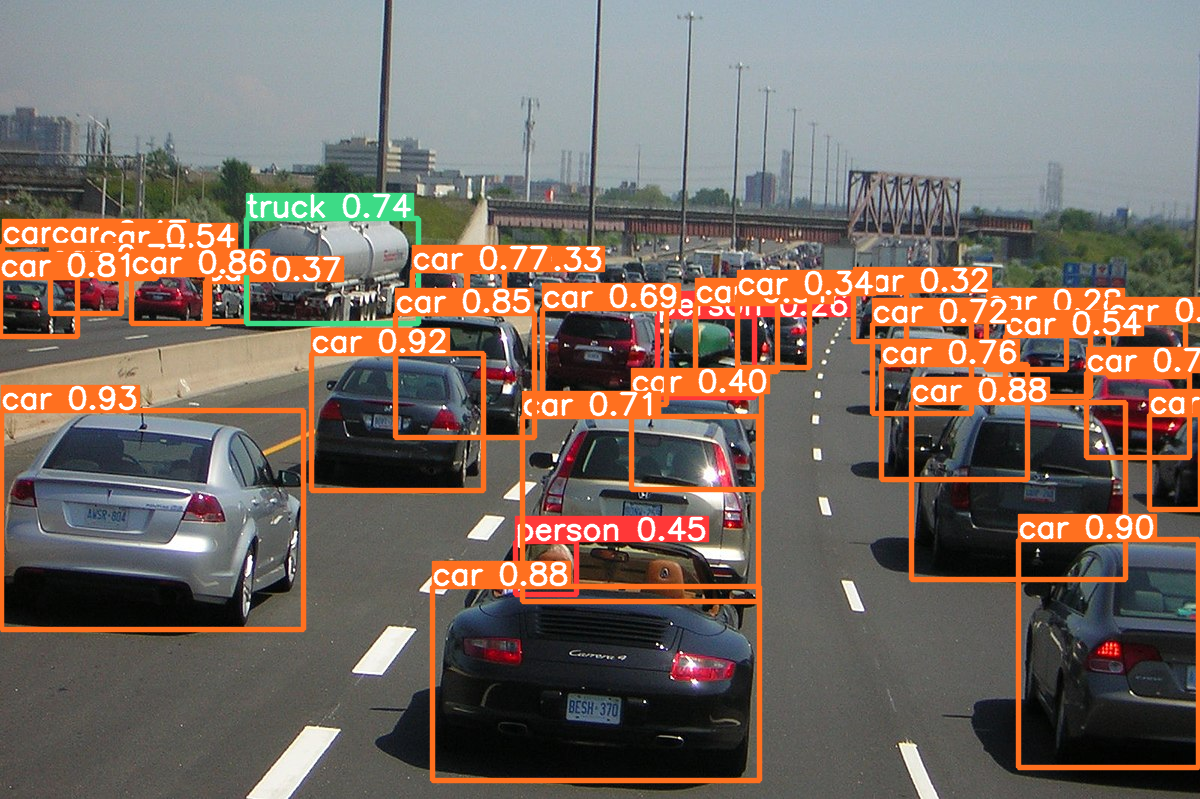

In [42]:
import requests
from io import BytesIO

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/401_Gridlock.jpg/1200px-401_Gridlock.jpg'

# Загрузка изображения
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Выполнение обнаружения объектов
results = model(image)

# Вывод результатов
results.print()
results.show()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1501.4ms pre-process, 189.3ms inference, 1.4ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp
image 1/1: 720x1280 2 persons, 2 ties
Speed: 1501.4ms pre-process, 189.3ms inference, 1.4ms NMS per image at shape (1, 3, 384, 640)


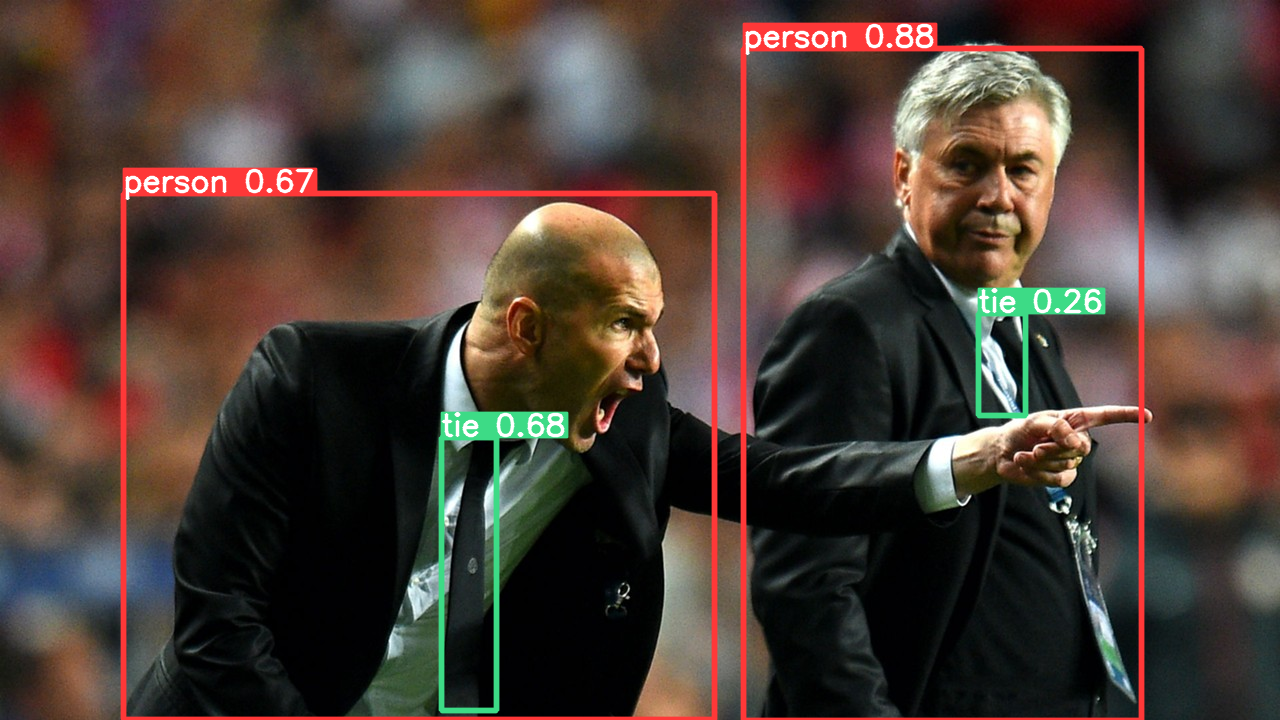

In [6]:
# Images
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

# Вывод результатов
results.print()
results.show()

## For streaming

In [29]:
# !pip install -U yt-dlp
# !brew install yt-dlp/taps/yt-dlp
# !brew reinstall yt-dlp

In [22]:
# https://www.youtube.com/watch?v=8fkthbwqmB0
!yt-dlp -f "bestvideo[height<=1080][ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]/best" "https://www.youtube.com/watch?v=8fkthbwqmB0" -o "file.mp4"

[youtube] Extracting URL: https://www.youtube.com/watch?v=8fkthbwqmB0
[youtube] 8fkthbwqmB0: Downloading webpage
[youtube] 8fkthbwqmB0: Downloading ios player API JSON
[youtube] 8fkthbwqmB0: Downloading android player API JSON
[youtube] 8fkthbwqmB0: Downloading m3u8 information
[info] 8fkthbwqmB0: Downloading 1 format(s): 137+140
[download] file.f137.mp4 has already been downloaded
[download] 100% of    3.56MiB
[download] file.f140.m4a has already been downloaded
[download] 100% of  126.18KiB


In [30]:
# !wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg
# !wget https://pjreddie.com/media/files/yolov3.weights

In [27]:
import cv2
from PIL import Image
import torch
from matplotlib import pyplot as plt
from pathlib import Path
# from google.colab.patches import cv2_imshow

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load video file
video_path = 'file.mp4'  # Replace with your video file path
video_path = 'file.f137.mp4'  # Replace with your video file path

cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create output video writer
output_path = 'output_video.mp4'  # Replace with desired output file path
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or use 'XVID' codec for AVI format
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Convert frame to PIL image
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Perform object detection
    results = model(image, size=640)

    # Get bounding box coordinates, labels, and confidence scores
    boxes = results.xyxy[0].numpy()
    labels = [results.names[int(idx)] for idx in results.pred[0][:, -1].to(torch.int64).numpy()]
    scores = results.pred[0].cpu().detach().numpy()[:, 4]

    # Draw bounding boxes on the frame
    for i in range(len(boxes[0])):
        x1, y1, x2, y2 = boxes[i][:4].astype(int)
        label = labels[i]
        score = scores[i]
        color = (0, 255, 0)  # Green color for bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, f'{label}: {score:.2f}', (x1, y1 - 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write frame to output video
    out.write(frame)

    # Display processed frame
    # # cv2.imshow('Object Detection', frame)
    # cv2_imshow(frame)
    # if cv2.waitKey(1) == ord('q'):
    #     break

# Release video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()

Using cache found in /Users/user/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-11 Python-3.8.8 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 



- Ultralytics YOLOv8 https://habr.com/ru/articles/710016/
- Обучите YOLOv8 на пользовательском наборе данных https://habr.com/ru/articles/714232/
- Асылбек Малибаев - Автоматическая модерация изображений https://youtu.be/G86j8DGS5As